# Trabajo práctico número 1

## Hacer un programa que utilice un Algoritmo Genético Canónico para buscar un máximo de la función:

#### f(x) = (x/coef)2 en el dominio [0 , 2^(30 - 1)]
donde coef = 2^(30-1)
teniendo en cuenta los siguientes datos:

1– Probabilidad de Crossover = 0,75

2– Probabilidad de Mutación = 0,05

3– Población Inicial: 10 individuos

4– Ciclos del programa: 200

5– Método de Selección: Ruleta

6– Método de Crossover: 1 Punto

7– Método de Mutación: invertida

#### El espacio solución estara formado por cromosomas de longitud 30
 y cada gen sera un dígito
binario 0 o 1

### Constantes

In [179]:
PROB_CROSSOVER = 0.75
PROB_MUTACION = 0.05
CICLOS = 200
CANTIDAD_POBLACION = 10
COEF = 1073741823 # 2^29
CANTIDAD_GENES = 30
ITERACIONES_IMPRIMIBLES = [20, 100, 200]

### Librerías necesarias

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generando población inicial aleatoria

In [181]:
def poblacionInicial():
    rng = np.random.default_rng() # Random Number Generator
    # El 12345 es la semilla, poner sin semilla para q en cada ejecución genere nuevos aleatorios.
    poblacion_decimal = rng.integers(low=0, high=COEF, size=CANTIDAD_POBLACION)
    return poblacion_decimal
poblacion_decimal = poblacionInicial()
poblacion_decimal

array([669370509, 789305139, 854126012, 866272428, 314836389, 686680001,
       866844209, 709475818,  10488053, 413493582], dtype=int64)

#### Convirtiendo la población inicial a binario

In [182]:
def convertirPoblacion(pob_ini, bin=True): # Pasar False para convertir a decimal
    pob_fin = []
    contador = 0
    for numero in pob_ini:
        if bin:
            # convirtiendo cada número decimal en binario de 8 dígitos.
            pob_fin.append(format(numero,'030b'))
        else:
            pob_fin.append(int(str(numero), 2))
    return pob_fin

poblacion_binarios= convertirPoblacion(poblacion_decimal)
poblacion_binarios

['100111111001011100100010001101',
 '101111000010111101011100110011',
 '110010111010001110110110111100',
 '110011101000100100010010101100',
 '010010110001000000010110100101',
 '101000111011011110011111000001',
 '110011101010101111111000110001',
 '101010010010011011110111101010',
 '000000101000000000100011110101',
 '011000101001010110100101001110']

### Función objetivo

In [183]:
#(x/coef)2
# Pasar población decimal
def funcionObjetivo(pob):
    colObjetivo=[]
    # El nombre cromosoma es por semántica, en realidad va a trabajar con cada valor decimal
    for cromosoma in pob:
        colObjetivo.append((int(cromosoma)/int(COEF))**2)
    #convertir lista en numpy arrray (para operaciones matemáticas)
    npColObjetivo = np.array(colObjetivo)
    return npColObjetivo

### Generando un marco de datos

In [184]:
def generarDataFrame(pob_dec, pob_bin):
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 'FuncionObjetivo':funcionObjetivo(pob_dec)}
    dataFrame = pd.DataFrame(data)
    dataFrame['Fitness'] = dataFrame['FuncionObjetivo'] / dataFrame['FuncionObjetivo'].sum()
    return dataFrame

marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
display(marcoDeDatos)

,Decimales,Binarios,FuncionObjetivo,Fitness
0,669370509,100111111001011100100010001101,0.388627,0.098527
1,789305139,101111000010111101011100110011,0.540369,0.136998
2,854126012,110010111010001110110110111100,0.632767,0.160424
3,866272428,110011101000100100010010101100,0.650892,0.165019
4,314836389,010010110001000000010110100101,0.085975,0.021797
5,686680001,101000111011011110011111000001,0.408987,0.103689
6,866844209,110011101010101111111000110001,0.651752,0.165237
7,709475818,101010010010011011110111101010,0.436592,0.110688
8,10488053,000000101000000000100011110101,0.000095,0.000024
9,413493582,011000101001010110100101001110,0.148299,0.037598


#### Estadisticas

In [185]:
def generarEstadisticas(dataFrame):
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ], 'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ], 'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    return dataFrame_stats, stats

marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)

display(marcoDeDatos_stats)

,Suma,Promedio,Máximo,Mínimo
Función objetivo,3.944355,0.394436,0.651752,0.000095
Fitness,1.000000,0.100000,0.165237,0.000024


### Generando una nueva población a partir de otra

Selección de padres para la próxima generación

#### Método ruleta

In [186]:
def ruleta(dataFrame): #pasar marco de datos
    # TODO PREGUNTAR RULETA ALEATORIA O BASADA EN PROPORCIONES
    probabilidades = np.array(dataFrame['Fitness']) #Asigna probabilidad basada en el fitness
    cromosomas = np.array(dataFrame['Binarios'])
    np.random.seed() 
    salida = np.random.choice(cromosomas, size=int(CANTIDAD_POBLACION), p=probabilidades)
    return salida

cromosomasPadresRuleta = ruleta(marcoDeDatos)
cromosomasPadresRuleta

array(['110011101010101111111000110001', '011000101001010110100101001110',
       '011000101001010110100101001110', '100111111001011100100010001101',
       '101010010010011011110111101010', '110011101000100100010010101100',
       '101000111011011110011111000001', '110010111010001110110110111100',
       '110011101000100100010010101100', '100111111001011100100010001101'],
      dtype=object)

#### Método torneo

In [187]:
def torneo(dataFrame):
    salida = []
    fitness = np.array(dataFrame['Fitness'])
    cromosomas = np.array(dataFrame['Binarios'])
    for i in range(0,CANTIDAD_POBLACION):
        posiblesCantidades = [ x for x in range(1,11)]
        np.random.seed() 
        cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
        miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
        ganador = np.amax(miembrosTorneo)
        indiceGanador = np.where(fitness == ganador) # retorna ndarray
        cromosomaGanador = cromosomas[indiceGanador[0][0]]
        salida.append(cromosomaGanador)
    return salida

cromosomasPadresTorneo = torneo(marcoDeDatos)
cromosomasPadresTorneo

['110011101010101111111000110001',
 '110011101000100100010010101100',
 '110010111010001110110110111100',
 '110011101010101111111000110001',
 '110011101010101111111000110001',
 '110011101010101111111000110001',
 '110011101010101111111000110001',
 '110011101000100100010010101100',
 '110010111010001110110110111100',
 '110011101010101111111000110001']

Test de prueba (podemos borrar desp)

In [188]:
fitness = np.array(marcoDeDatos['Fitness'])
cromosomas = np.array(marcoDeDatos['Binarios'])
posiblesCantidades = [ x for x in range(1,11)]
cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
ganador = np.amax(miembrosTorneo)
indiceGanador = np.where(fitness == ganador)
print(miembrosTorneo)
print("Cantidad: "+str(cantidadMiembrosTorneo[0]))
print("Fitness ganador: "+str(ganador))
print("Indice: "+str(indiceGanador[0][0]))
print("Cromosoma: "+str(cromosomas[indiceGanador[0][0]]))

[0.02179687 0.13699797 0.09852749 0.16501873 0.03759775 0.16042356
 0.10368909]
Cantidad: 7
Fitness ganador: 0.16501873008723392
Indice: 3
Cromosoma: 110011101000100100010010101100


#### Crossover

In [189]:
def crossover(padres): #Pasar ndarray cromosomas padres
    hijos = []
    for i in range(0,10,2):
        opciones=[True, False]
        np.random.seed() 
        prob_cross = np.array([PROB_CROSSOVER,(1-PROB_CROSSOVER)]) # Probabilidades de cada opción
        cross = np.random.choice(opciones, size=1, p=prob_cross)
        if cross[0]:
            posiciones = [x for x in range(0, CANTIDAD_GENES)]
            probCorte = [1/CANTIDAD_GENES for x in range(0, CANTIDAD_GENES)]
            corte = np.random.choice(posiciones, size=1, p=probCorte) # Devuelve ndarray de 1 elemento
            posicionCorte = corte[0] 
            primerTiraGenesPadre1 = padres[i][0:posicionCorte]
            segundaTiraGenesPadre1 = padres[i][posicionCorte:CANTIDAD_GENES]
            primerTiraGenesPadre2 = padres[i+1][0:posicionCorte]
            segundaTiraGenesPadre2 = padres[i+1][posicionCorte:CANTIDAD_GENES]
            hijos.append(primerTiraGenesPadre1 + segundaTiraGenesPadre2) # Hijo 1
            hijos.append(primerTiraGenesPadre2 + segundaTiraGenesPadre1) # Hijo 2
        else:
            hijos.append(padres[i])
            hijos.append(padres[i+1])
    return hijos

##### Crossover ruleta

In [190]:
cromosomasHijosRuleta = crossover(cromosomasPadresRuleta)
cromosomasHijosRuleta

['110011101010101111100101001110',
 '011000101001010110111000110001',
 '011000101001010110100010001101',
 '100111111001011100100101001110',
 '101011101000100100010010101100',
 '110010010010011011110111101010',
 '101010111010001110110110111100',
 '110000111011011110011111000001',
 '110011101000100100010010101101',
 '100111111001011100100010001100']

##### Crossover torneo

In [191]:
cromosomasHijosTorneo = crossover(cromosomasPadresTorneo)
print(cromosomasHijosTorneo)

['110011101000100100010010101100', '110011101010101111111000110001', '110010111010001111111000110001', '110011101010101110110110111100', '110011101010101111111000110001', '110011101010101111111000110001', '110011101010101111111000110001', '110011101000100100010010101100', '110010111010001110110110110001', '110011101010101111111000111100']


#### Mutación

In [192]:
def mutacion(cromosomas):
    hijos = []
    rng = np.random.default_rng() # Random Number Generator
    for i in range(0,10):
        mutar = rng.random()
        
        if (PROB_MUTACION > mutar):
            posicion = rng.integers(low=0, high=29, size=1)
            #print("Posición: " + str(posicion))
            #print(cromosomas[i][posicion[0]])
            #print(cromosomas[i])
            if ( int(cromosomas[i][posicion[0]]) == 1 ):
                cromosoma = list(cromosomas[i]) # Convierte el lista al cromosoma seleccionado
                # Lo hice así porque python no permite asignar valores a una pisición de un array
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '0' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)  # volverlo a convertir en int (o podría ser a array)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
            else:
                cromosoma = list(cromosomas[i]) 
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '1' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
        else:
            hijos.append(cromosomas[i])
    return hijos 

hijosmutados = mutacion(cromosomasHijosRuleta)

hijosmutados

['110011101010101111100101001110',
 '011000101001010110111000110001',
 '011000101001010110100010001101',
 '100111111001011100100101001110',
 '101011101000100100010010101100',
 '110010010010011011110111101010',
 '101010111010001110110110111100',
 '110000111011011110011111000001',
 '110011101000100100010010101101',
 '100111111001011100100010001100']

### Gráficos

In [193]:
def hacerGrafico(estadisticas, iteracion):
    estadisticas["Iteración"]=[x for x in range(1,iteracion+1)]
    plt.figure(figsize=(20,20))
    plt.plot(estadisticas["Iteración"], estadisticas["Máximo"], 'b.-', label="Máximo")
    plt.plot(estadisticas["Iteración"], estadisticas["Mínimo"], 'r.-', label="Mínimo")
    plt.plot(estadisticas["Iteración"], estadisticas["Promedio"], 'g.-', label="Promedio")
    plt.legend()
    plt.title("Gráfica iteración: " + str(iteracion))
    plt.xticks(estadisticas["Iteración"][::1])
    plt.yticks(np.arange(0, 1.01, step=0.025))
    plt.xlabel("Iteraciones")
    plt.ylabel("F. Objetivo")
    plt.show()

### Main

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.110989,0.911099,0.911204,0.911087
Fitness,1.000000,0.100000,0.100012,0.099999


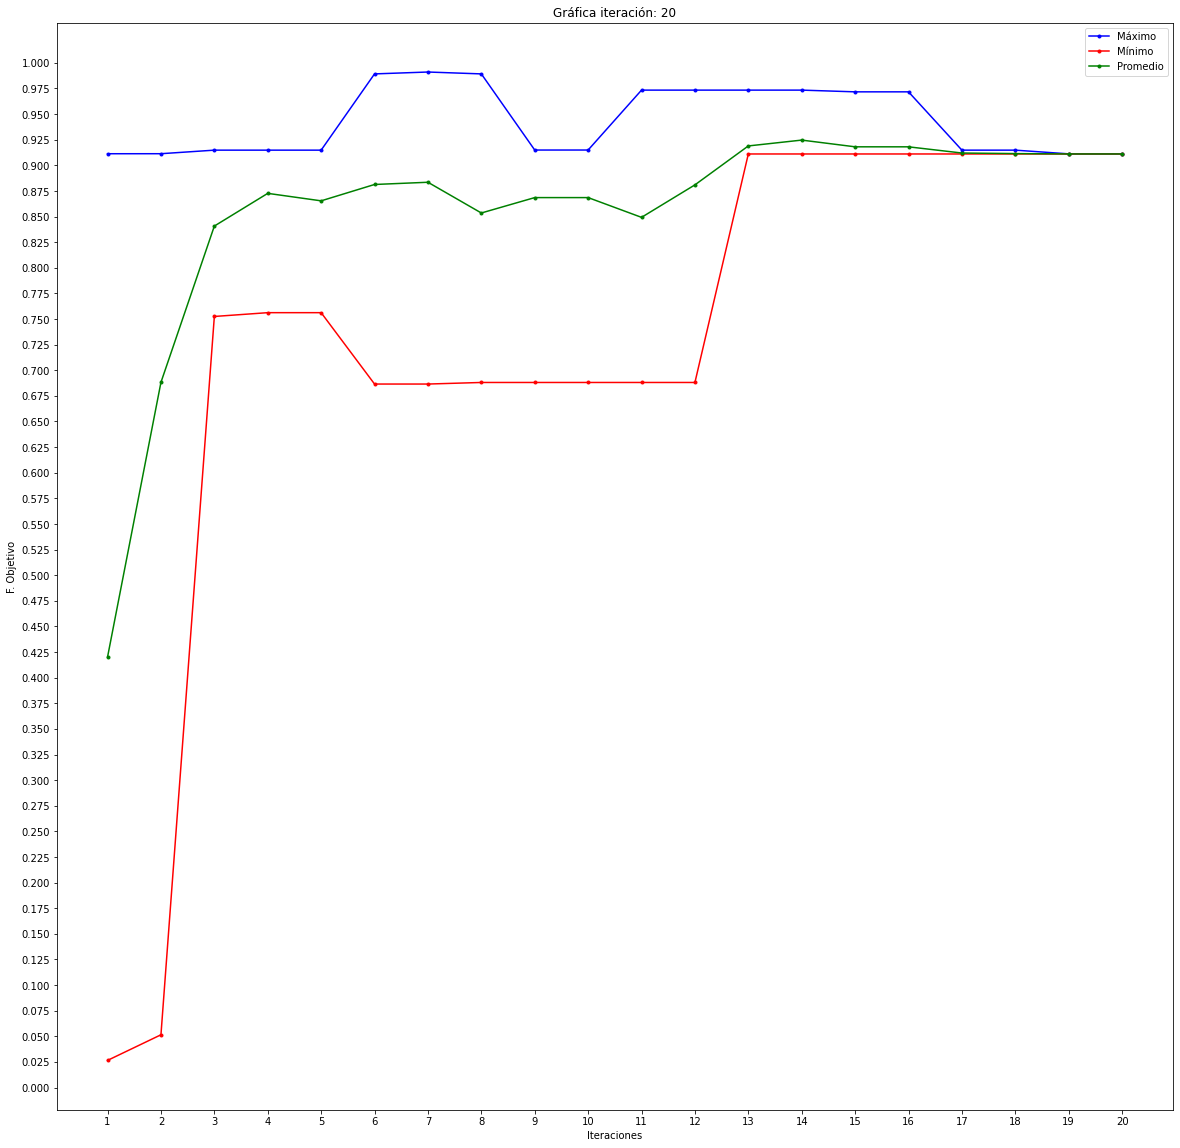

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.109047,0.910905,0.911092,0.909226
Fitness,1.000000,0.100000,0.100021,0.099816


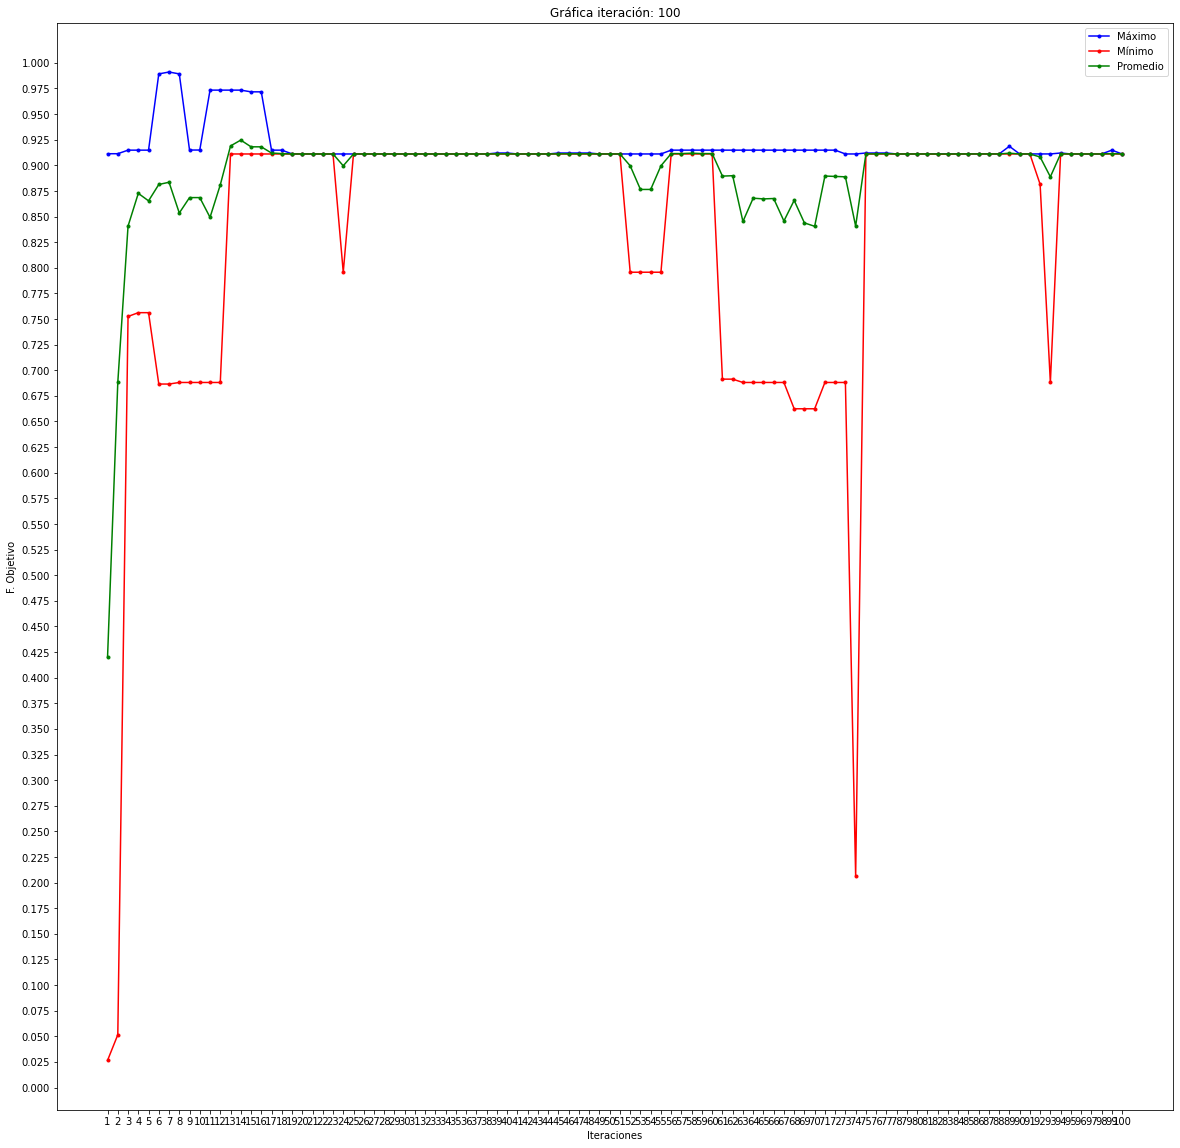

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.833093,0.983309,0.983313,0.983309
Fitness,1.000000,0.100000,0.100000,0.100000


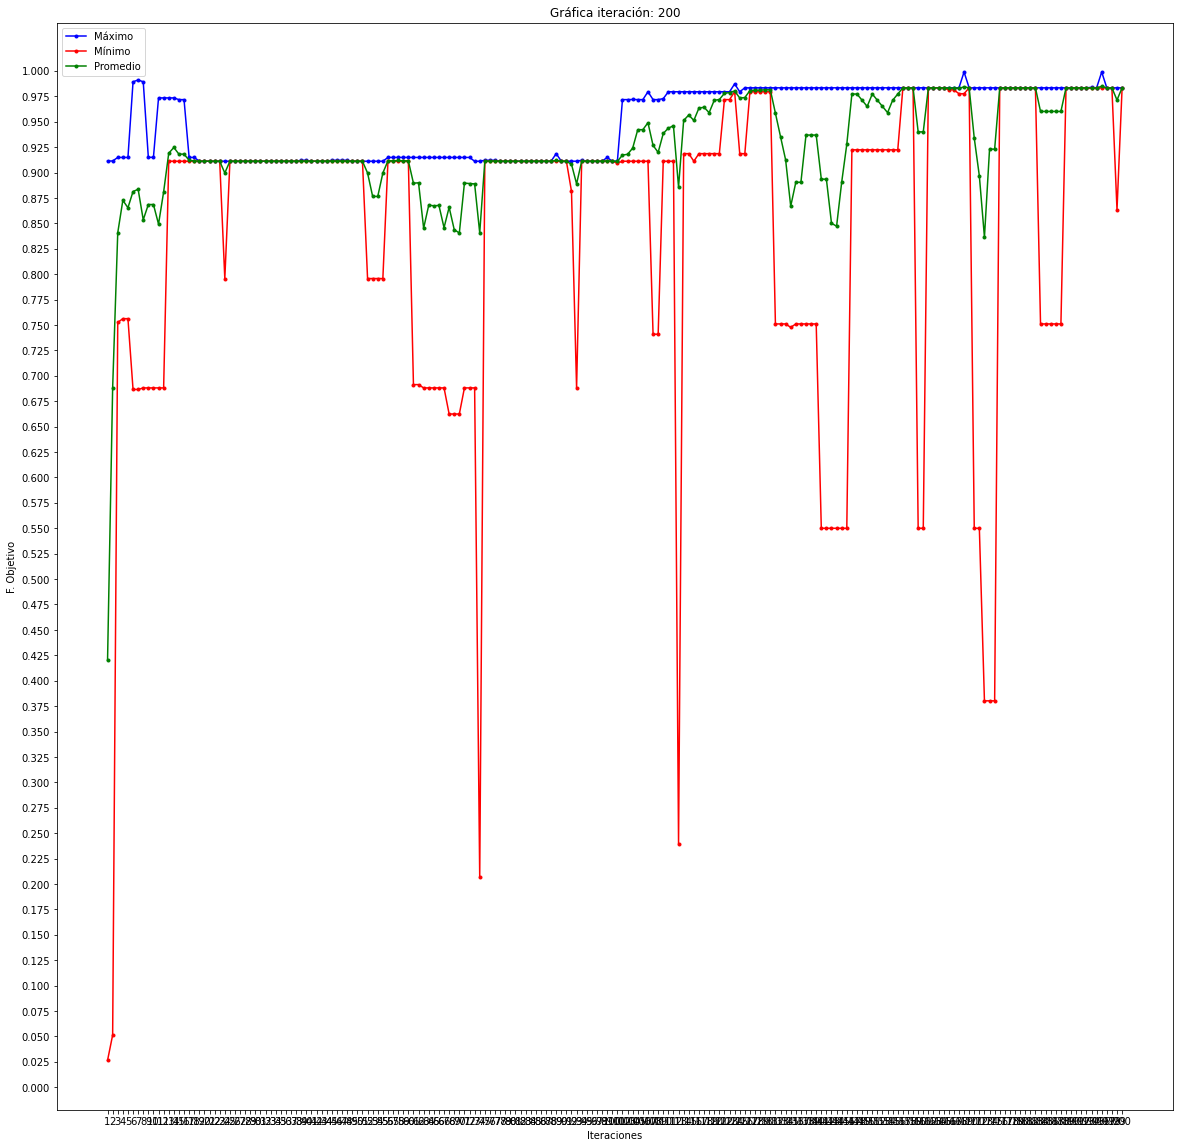

In [194]:
estadisticas = { "Máximo":[], "Mínimo":[], "Promedio":[]}
poblacion_decimal = poblacionInicial()
poblacion_binarios = convertirPoblacion(poblacion_decimal)
for i in range(0,200):
    marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
    marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
    estadisticas["Máximo"].append(stats['Máximo'][0])
    estadisticas["Mínimo"].append(stats['Mínimo'][0])
    estadisticas["Promedio"].append(stats['Promedio'][0])
    cromosomasPadresRuleta = ruleta(marcoDeDatos)
    cromosomasHijosRuleta = crossover(cromosomasPadresRuleta)
    cromosomasHijosMutados = mutacion(cromosomasHijosRuleta)
    poblacion_binarios = cromosomasHijosMutados
    poblacion_decimal = convertirPoblacion(poblacion_binarios, False)
    if ( (i==(ITERACIONES_IMPRIMIBLES[0] - 1)) or (i==(ITERACIONES_IMPRIMIBLES[1] - 1)) or (i == (ITERACIONES_IMPRIMIBLES[2] - 1)) ): # 20, 100, 200. le resto 1 xq empieza en 0.
        marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
        marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
        
        display(marcoDeDatos_stats.style.set_table_attributes("style='display:inline'").set_caption('Tabla iteración: ' + str(i+1)))
        hacerGrafico(estadisticas, i+1)

# opciones extra hacer mismo grafico sin mutación. (Se ve como se estanca la función en maximos locales)
